https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows?select=0619_UkraineCombinedTweetsDeduped.csv.gzip

nama dataset 0619_UkraineCombinedTweetsDeduped.csv.gzip

In [1]:
import numpy as np 
import pandas as pd
import csv


In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("Tugas/twitter.csv", encoding="ISO-8859-1", low_memory=False)
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,0,1292087152780685317,angelofuriase,"Yo soy el que yo soy y punto/PolÃ­ticamente Incorrecto/Ant1zqu13rd1sta acÃ©rrimo///Pensar es difÃ­cil. Por eso,la mayorÃ­a de la gente prefiere juzgar.\nC. G. Jung",NaN,224,530,60117,2020-08-08 13:16:10.000000,1538310591214927872,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-06-19 01:51:15.110032
1,1,1386395679824646145,the_postman24,the postman 24 is a media organization focused on bringing news from all over the world.,"LMC Business Wing, London, UK",56,48,2836,2021-04-25 19:05:38.000000,1538310591894405122,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-06-19 01:51:15.078105
2,2,20238770,AilsaLaing,#OurNHS #ADHD #SlavaUkraini \nRetweeting (without apology) cos others so often say it better than I can. She/Her.,Edinburgh,3942,2661,111351,2009-02-06 14:07:58.000000,1538310592422891521,...,1314241954058833920,MrKovalenko,0,0,NaN,False,0,0,NaN,2022-06-19 01:18:47.301006
3,3,88537980,elpoliticonews,Actualidad y anÃ¡lisis sobre la polÃ­tica de las AmÃ©ricas y del mundo.\nHablemos de polÃ­tica ð£ï¸\nhttps://t.co/dVhNrzxxvG,"Washington, DC",1923,218710,1475000,2009-11-08 23:26:19.000000,1538310592796172288,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-06-19 16:22:39.344400
4,4,272502906,GainMoneyFaster,ðð¤ð£ðð® ð¾ð¤ððð showing you best Clever Passive Income streams ð¬ð§ ðªðº ð¬ð­ ðªð¸ ð¨ð­ ð³ð¬ ð¨ð· ð®ðª 185+ countries earn daily $ 100 and more,Bilbao,5658,5356,42541,2011-03-26 17:01:39.000000,1538310592846602240,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-06-19 01:51:15.054442


In [3]:
df.shape

(178804, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178804 entries, 0 to 178803
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               178804 non-null  int64 
 1   userid                   178804 non-null  int64 
 2   username                 178804 non-null  object
 3   acctdesc                 142747 non-null  object
 4   location                 104684 non-null  object
 5   following                178804 non-null  int64 
 6   followers                178804 non-null  int64 
 7   totaltweets              178804 non-null  int64 
 8   usercreatedts            178804 non-null  object
 9   tweetid                  178804 non-null  int64 
 10  tweetcreatedts           178804 non-null  object
 11  retweetcount             178804 non-null  int64 
 12  text                     178804 non-null  object
 13  hashtags                 178804 non-null  object
 14  language            

In [5]:
df.isna().sum().sort_values(ascending=False)

coordinates                178669
quoted_status_username     171851
in_reply_to_screen_name    168424
location                    74120
original_tweet_username     61366
acctdesc                    36057
Unnamed: 0                      0
favorite_count                  0
quoted_status_userid            0
quoted_status_id                0
is_quote_status                 0
in_reply_to_user_id             0
in_reply_to_status_id           0
original_tweet_userid           0
original_tweet_id               0
is_retweet                      0
language                        0
userid                          0
hashtags                        0
text                            0
retweetcount                    0
tweetcreatedts                  0
tweetid                         0
usercreatedts                   0
totaltweets                     0
followers                       0
following                       0
username                        0
extractedts                     0
dtype: int64

In [6]:
awal = df["tweetcreatedts"].min()
akhir = df["tweetcreatedts"].max()

print(f"rentang waktu twitter dibuat adalah dari {awal} sampai {akhir}")

rentang waktu twitter dibuat adalah dari 2022-06-19 00:00:00.000000 sampai 2022-06-19 23:59:59.000000


In [7]:
df.language.value_counts().head()

en     118227
fr      12420
it      10530
de       9534
und      6853
Name: language, dtype: int64

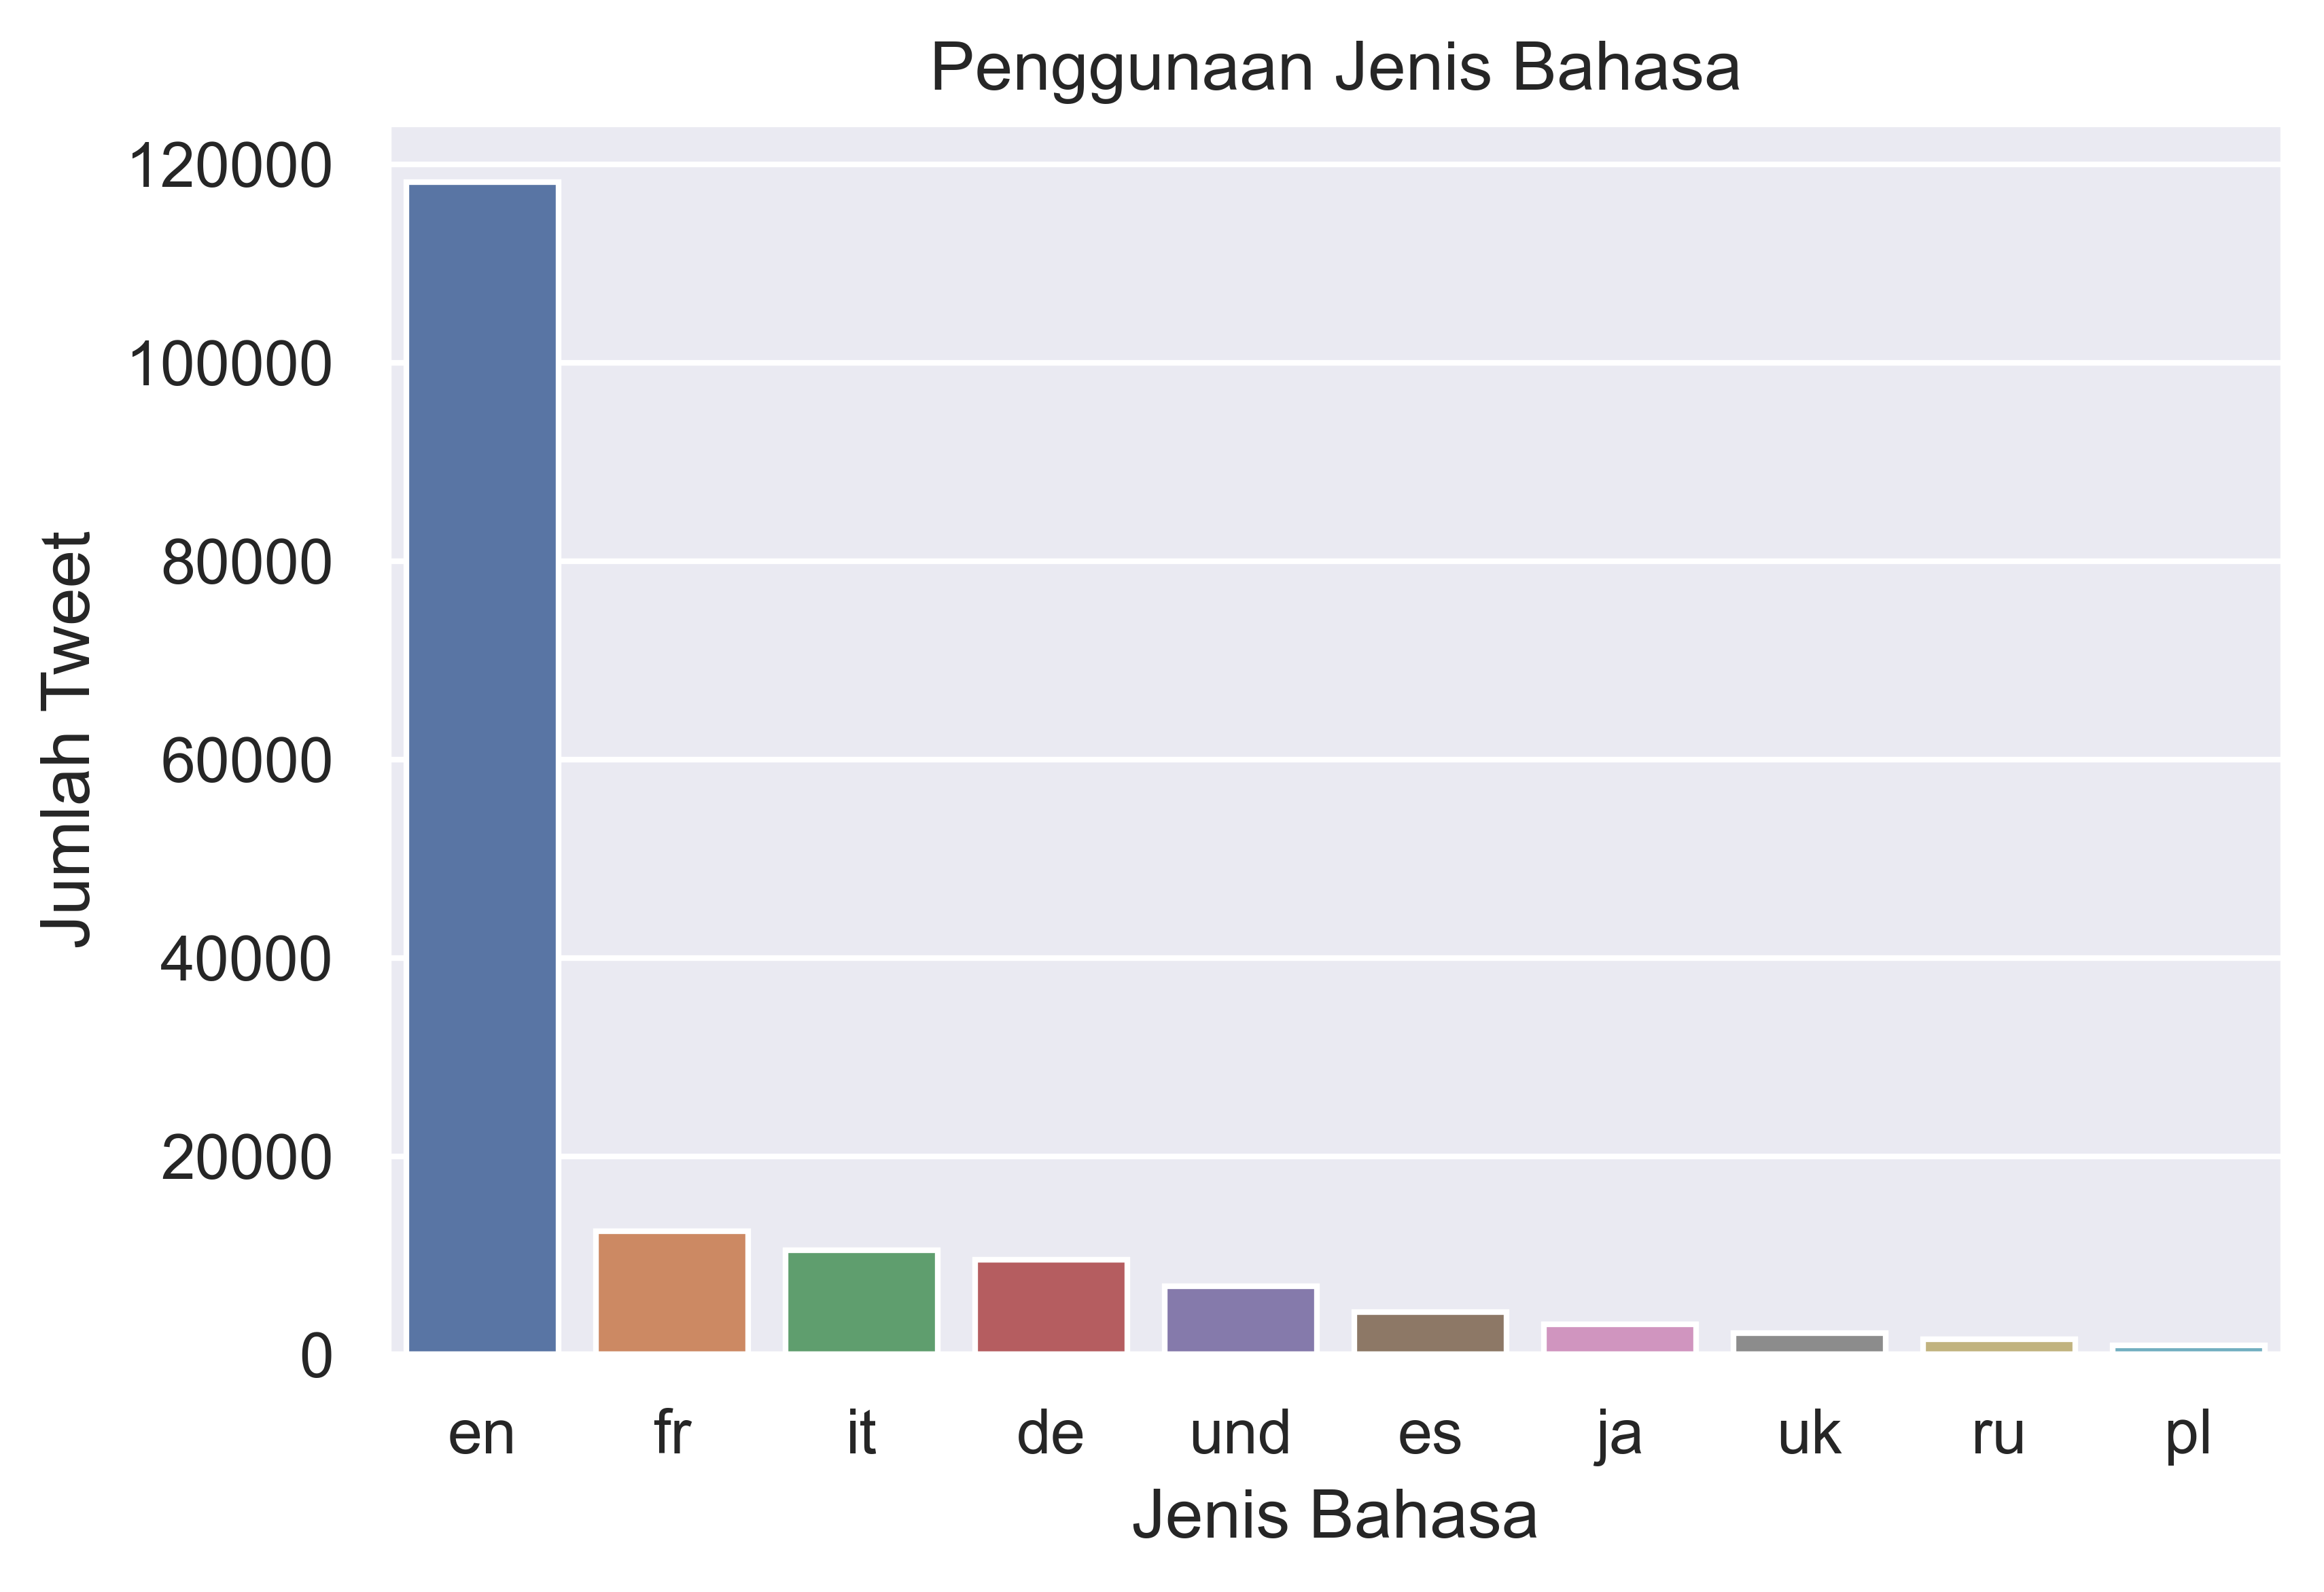

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=600)
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(x = df.language.value_counts().index[:10], y = df.language.value_counts()[:10])
plt.xlabel("Jenis Bahasa")
plt.ylabel("Jumlah Tweet")
plt.title("Penggunaan Jenis Bahasa")
plt.show()

In [9]:
eng = df[df["language"] == "en"]
eng.shape

(118227, 29)

In [10]:
loc = df[df["language"] == "en"].location.value_counts().sort_values(ascending=False)[:100]
loc = pd.DataFrame(loc)
loc = loc.reset_index()
loc.head()

,index,location
0,United States,1581
1,"Chennai, India",867
2,"England, United Kingdom",808
3,Ukraine,805
4,India,667


In [11]:
from geopy.geocoders import Nominatim

long,lat=[],[]
geolocator = Nominatim(user_agent="MyApp")
for i in range(len(loc)):
    location = geolocator.geocode(loc['index'][i], timeout=10)
    if location is None:
        lat.append(None)
        long.append(None)
    else:
        long.append(location.longitude)
        lat.append(location.latitude)

In [12]:
loc['Longitude'] = long
loc['Latitude'] = lat
loc = loc.dropna(axis=0)
loc.shape

(90, 4)

In [13]:
import folium
from folium.plugins import MarkerCluster

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(loc)):
        lat = loc.iloc[i]['Latitude']
        long = loc.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, fill =True).add_to(marker_cluster)
world_map

In [14]:
tweets =eng.loc[:, ["userid", "text", "hashtags"]]
tweets.head()

,userid,text,hashtags
0,1292087152780685317,"#Naperville\n#Illinois\n#US\n#USA \n\nJune 3, 2022\n\nNaperville Police Fatally Shot Man Who Charged at Officer With Hatchet: Authorities\n\nA man got out of the vehicle, charged at the officer with a hatchet in his hand, authorities said.\n\nhttps://t.co/NQKiD5gy4j\n\nhttps://t.co/yijZFsEUcR","[{'text': 'Naperville', 'indices': [0, 11]}, {'text': 'Illinois', 'indices': [12, 21]}, {'text': 'US', 'indices': [22, 25]}, {'text': 'USA', 'indices': [26, 30]}]"
1,1386395679824646145,5 Disability Issue Questions To Ask State And Local Midterm Election Candidates\nRead more on the postman24:\nhttps://t.co/sHpRUJUazb\n#News \n#BreakingNews\n#dailyupdate\n#dailynewsonline https://t.co/8FxAX4uouw,"[{'text': 'News', 'indices': [132, 137]}, {'text': 'BreakingNews', 'indices': [139, 152]}, {'text': 'dailyupdate', 'indices': [153, 165]}, {'text': 'dailynewsonline', 'indices': [166, 182]}]"
2,20238770,"On June 15, the U.S. Department of Defense (DoD) announced $1 billion in additional security assistance for #Ukraine. Here is the full official list of weapons and equipment: https://t.co/TnE2lZGzas","[{'text': 'Ukraine', 'indices': [108, 116]}]"
4,272502906,"Do you know anyone who uses the Web?\nYes, how many?\nMultiply that by 100 Dollarsâ¦\n\nhttps://t.co/Tq6hqOSEsa\n\n#money #maker #moneymaker #passive #income #money #earn #internet #euro #dollar #stock #exchange #currency #stockbroker #market #bitcoin #btc #distribution #usa https://t.co/svYj8QEN3d","[{'text': 'money', 'indices': [108, 114]}, {'text': 'maker', 'indices': [115, 121]}, {'text': 'moneymaker', 'indices': [122, 133]}, {'text': 'passive', 'indices': [134, 142]}, {'text': 'income', 'indices': [143, 150]}, {'text': 'money', 'indices': [151, 157]}, {'text': 'earn', 'indices': [158, 163]}, {'text': 'internet', 'indices': [164, 173]}, {'text': 'euro', 'indices': [174, 179]}, {'text': 'dollar', 'indices': [180, 187]}, {'text': 'stock', 'indices': [188, 194]}, {'text': 'exchange', 'indices': [195, 204]}, {'text': 'currency', 'indices': [205, 214]}, {'text': 'stockbroker', 'indices': [215, 227]}, {'text': 'market', 'indices': [228, 235]}, {'text': 'bitcoin', 'indices': [236, 244]}, {'text': 'btc', 'indices': [245, 249]}, {'text': 'distribution', 'indices': [250, 263]}, {'text': 'usa', 'indices': [264, 268]}]"
5,1583986518,"The Editorial Board: #Lemos' resignation leaves a leadership vacuum at a time when the agency is woefully short-staffed &amp; behind on its work. Itâs an opportunity for improved leadership, &amp; ""we urge Pres. #Biden to fill her seat quickly."" https://t.co/SKqaZoWW4e","[{'text': 'Lemos', 'indices': [21, 27]}, {'text': 'Biden', 'indices': [212, 218]}]"


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harjuno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import re
import warnings
warnings.filterwarnings('ignore')
import string
import pickle

# menghapus url
def urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [17]:
# menghapus emoji
def emot(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [18]:
# menghapus spasi berlebihan
def whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [19]:
# menghapus simbol
def symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [20]:
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
      # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [21]:
tweets['text'] = tweets['text'].str.lower()
tweets['text'] = tweets['text'].apply(urls)
tweets['text'] = tweets['text'].apply(symbols)
tweets['text'] = tweets['text'].apply(whitespaces)
tweets['text'] = tweets['text'].apply(emot)
tweets['processed_tweets'] = tweets['text'].apply(lambda x: process_tweets(x))

In [22]:
tweets.head()

,userid,text,hashtags,processed_tweets
0,1292087152780685317,"naperville illinois us usa june 3, 2022 naperville police fatally shot man who charged at officer with hatchet authorities a man got out of the vehicle, charged at the officer with a hatchet in his hand, authorities said.","[{'text': 'Naperville', 'indices': [0, 11]}, {'text': 'Illinois', 'indices': [12, 21]}, {'text': 'US', 'indices': [22, 25]}, {'text': 'USA', 'indices': [26, 30]}]",naperville illinois u usa june 2022 naperville police fatally shot man charged officer hatchet authority man got vehicle charged officer hatchet hand authority said
1,1386395679824646145,5 disability issue questions to ask state and local midterm election candidates read more on the postman24 news breakingnews dailyupdate dailynewsonline,"[{'text': 'News', 'indices': [132, 137]}, {'text': 'BreakingNews', 'indices': [139, 152]}, {'text': 'dailyupdate', 'indices': [153, 165]}, {'text': 'dailynewsonline', 'indices': [166, 182]}]",disability issue question ask state local midterm election candidate read postman24 news breakingnews dailyupdate dailynewsonline
2,20238770,"on june 15, the u.s. department of defense dod announced 1 billion in additional security assistance for ukraine. here is the full official list of weapons and equipment","[{'text': 'Ukraine', 'indices': [108, 116]}]",june 15 u department defense dod announced billion additional security assistance ukraine full official list weapon equipment
4,272502906,"do you know anyone who uses the web? yes, how many? multiply that by 100 dollars money maker moneymaker passive income money earn internet euro dollar stock exchange currency stockbroker market bitcoin btc distribution usa","[{'text': 'money', 'indices': [108, 114]}, {'text': 'maker', 'indices': [115, 121]}, {'text': 'moneymaker', 'indices': [122, 133]}, {'text': 'passive', 'indices': [134, 142]}, {'text': 'income', 'indices': [143, 150]}, {'text': 'money', 'indices': [151, 157]}, {'text': 'earn', 'indices': [158, 163]}, {'text': 'internet', 'indices': [164, 173]}, {'text': 'euro', 'indices': [174, 179]}, {'text': 'dollar', 'indices': [180, 187]}, {'text': 'stock', 'indices': [188, 194]}, {'text': 'exchange', 'indices': [195, 204]}, {'text': 'currency', 'indices': [205, 214]}, {'text': 'stockbroker', 'indices': [215, 227]}, {'text': 'market', 'indices': [228, 235]}, {'text': 'bitcoin', 'indices': [236, 244]}, {'text': 'btc', 'indices': [245, 249]}, {'text': 'distribution', 'indices': [250, 263]}, {'text': 'usa', 'indices': [264, 268]}]",know anyone us web yes many multiply 100 dollar money maker moneymaker passive income money earn internet euro dollar stock exchange currency stockbroker market bitcoin btc distribution usa
5,1583986518,"the editorial board lemos resignation leaves a leadership vacuum at a time when the agency is woefully short staffed amp behind on its work. it s an opportunity for improved leadership, amp we urge pres. biden to fill her seat quickly.","[{'text': 'Lemos', 'indices': [21, 27]}, {'text': 'Biden', 'indices': [212, 218]}]",editorial board lemos resignation leaf leadership vacuum time agency woefully short staffed amp behind work opportunity improved leadership amp urge pres biden fill seat quickly


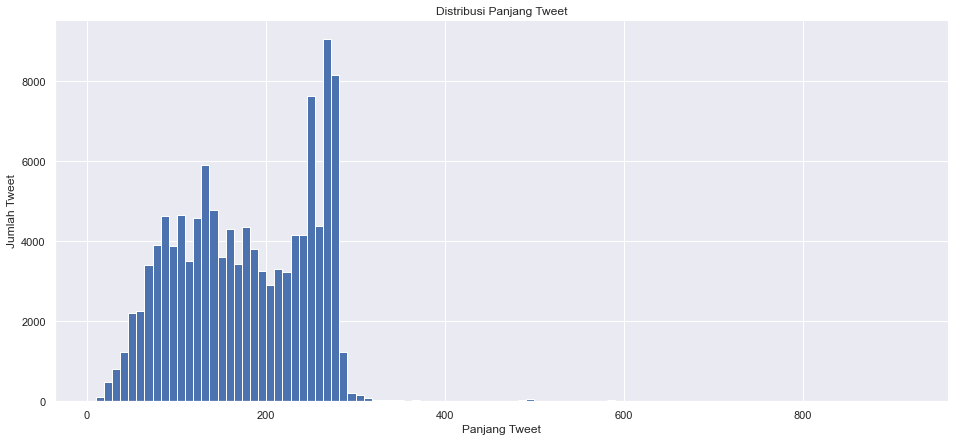

In [23]:
# panjang tweets
plt.figure(figsize=(16,7))
text_len = [len(d) for d in tweets.text]
plt.hist(text_len, bins=100)
plt.title('Distribusi Panjang Tweet')
plt.ylabel('Jumlah Tweet')
plt.xlabel('Panjang Tweet')
sns.despine();

In [24]:
def ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

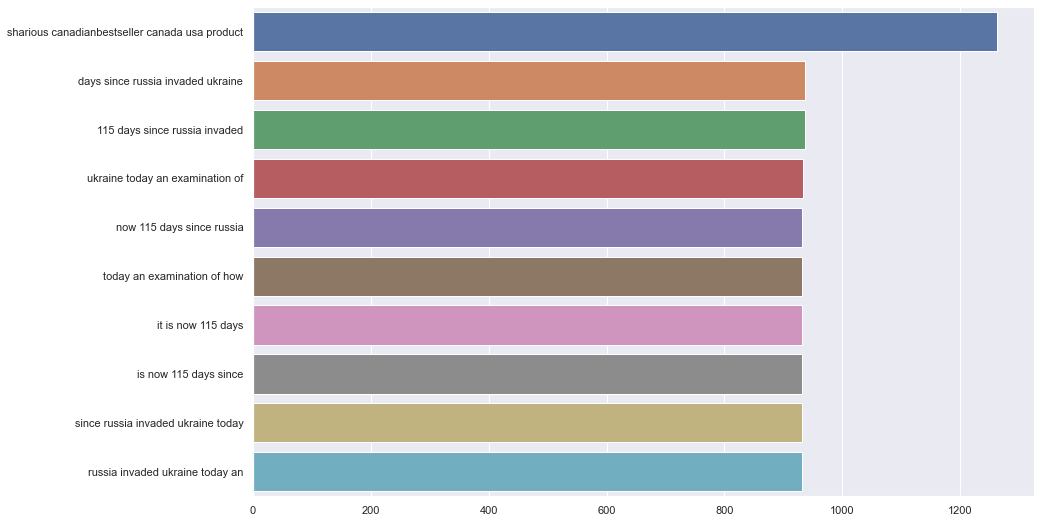

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

ngrams_barchart(tweets['text'],5)

In [26]:
from unidecode import unidecode
def hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [27]:
listTag = []
hashtagsListCollection = tweets["hashtags"].apply(hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        listTag.append(hashtag)

In [28]:
from collections import Counter

x = Counter(listTag)
topList = x.most_common(10)

In [29]:
tag = pd.DataFrame(topList)
tag.columns =['Hashtag','Tweets']
tag.T

,0,1,2,3,4,5,6,7,8,9
Hashtag,ukraine,russia,news,standwithukraine,russian,usa,putin,biden,ukrainerussiawar,nato
Tweets,49477,21583,11964,8799,7605,6483,5718,5324,4850,4779


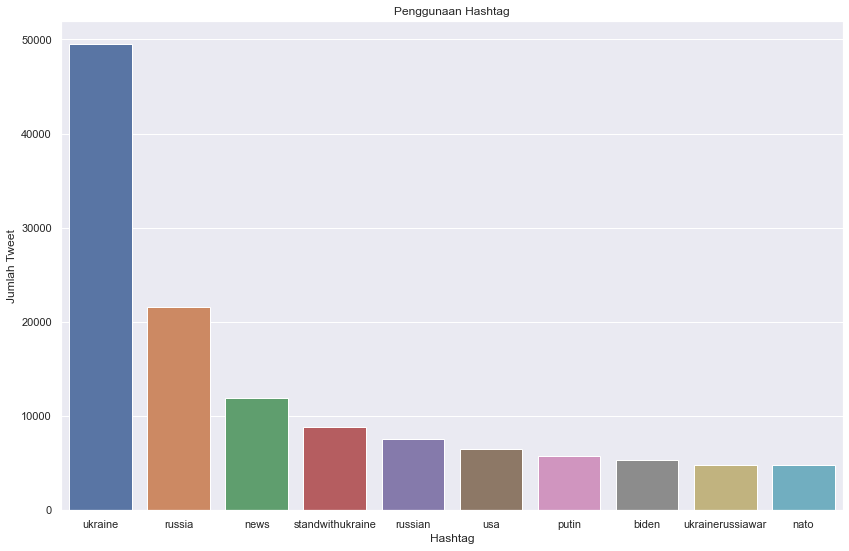

In [30]:
sns.barplot(x = tag['Hashtag'][:10], y = tag['Tweets'][:10])
plt.xlabel("Hashtag")
plt.ylabel("Jumlah Tweet")
plt.title("Penggunaan Hashtag")
plt.show()

In [31]:
import math

persen = math.ceil(len(df) * 0.01)

In [32]:
sample = tweets.sample(persen)
sample.reset_index(drop=True, inplace=True)
sample.shape

(1789, 4)

In [33]:
sample['text'].head()

0                                                                                                                                                              news canada britishcolumbia scientists work to protect b.c. island s crucial freshwater source from fire, drought 
1     jr66112852 matt hancock, having contributed to the mass murder of thousands of elderly brits, has since bolstered his wealth with the sale of a book, that also supported his lies to avoid accountability britain is a mess covid19 covid china vaccines ukraine monkeypox
2                                                                                                                                        translating and interpreting the below russia has admitted it had kidnapped from ukraine 1,9 million people including 307,423 children. 
3                                                                                                                                  ukraine the ukrainian 58th independent motorize

In [34]:
import flair
from flair.models import TextClassifier
sentimen = TextClassifier.load('en-sentiment')

2022-06-21 09:14:01,803 loading file C:\Users\Harjuno\.flair\models\sentiment-en-mix-distillbert_4.pt


In [35]:
def flair_prediction(x):
    Sentiment = []
    Sentiment_Score = []
    
    for sentence in x['text']:
        if sentence.strip() == "":
            Sentiment.append("")
            Senteiment_Score("")
        else:
            pred = flair.data.Sentence(sentence)
            sentimen.predict(pred)
            
            Sentiment.append(pred.labels[0].value)
            Sentiment_Score.append(pred.labels[0].score)
    
    x['Sentiment'] = Sentiment
    x['Sentiment_Score'] = Sentiment_Score

In [36]:
flair_prediction(sample)

In [37]:
sample.head()

,userid,text,hashtags,processed_tweets,Sentiment,Sentiment_Score
0,715260608,"news canada britishcolumbia scientists work to protect b.c. island s crucial freshwater source from fire, drought","[{'text': 'News', 'indices': [0, 5]}, {'text': 'Canada', 'indices': [6, 13]}, {'text': 'BritishColumbia', 'indices': [14, 30]}]",news canada britishcolumbia scientist work protect bc island crucial freshwater source fire drought,POSITIVE,0.973915
1,1465236285526880260,"jr66112852 matt hancock, having contributed to the mass murder of thousands of elderly brits, has since bolstered his wealth with the sale of a book, that also supported his lies to avoid accountability britain is a mess covid19 covid china vaccines ukraine monkeypox","[{'text': 'COVID19', 'indices': [226, 234]}, {'text': 'COVID', 'indices': [235, 241]}, {'text': 'China', 'indices': [242, 248]}, {'text': 'vaccines', 'indices': [249, 258]}, {'text': 'Ukraine', 'indices': [259, 267]}, {'text': 'monkeypox', 'indices': [268, 278]}]",jr66112852 matt hancock contributed mass murder thousand elderly brit since bolstered wealth sale book also supported lie avoid accountability britain mess covid19 covid china vaccine ukraine monkeypox,NEGATIVE,0.993436
2,1978230054,"translating and interpreting the below russia has admitted it had kidnapped from ukraine 1,9 million people including 307,423 children.","[{'text': 'Russia', 'indices': [40, 47]}, {'text': 'Ukraine', 'indices': [83, 91]}]",ranslating interpreting russia admitted kidnapped ukraine 19 million people including 307423 child,NEGATIVE,0.989343
3,1504592712745762817,ukraine the ukrainian 58th independent motorized infantry brigade hit a russian mortar position with a stugna p atgm sending the tube flying.,"[{'text': 'Ukraine', 'indices': [0, 8]}]",ukraine ukrainian 58th independent motorized infantry brigade hit russian mortar position stugna atgm sending tube flying,NEGATIVE,0.999614
4,200473172,this cartoon does a good job depicting hundreds of years of russia n colonialism in ukraine,"[{'text': 'Russia', 'indices': [60, 67]}, {'text': 'Ukraine', 'indices': [85, 93]}]",cartoon good job depicting hundred year russia colonialism ukraine,POSITIVE,0.999907


In [38]:
sample.Sentiment.value_counts()

NEGATIVE    1183
POSITIVE     606
Name: Sentiment, dtype: int64

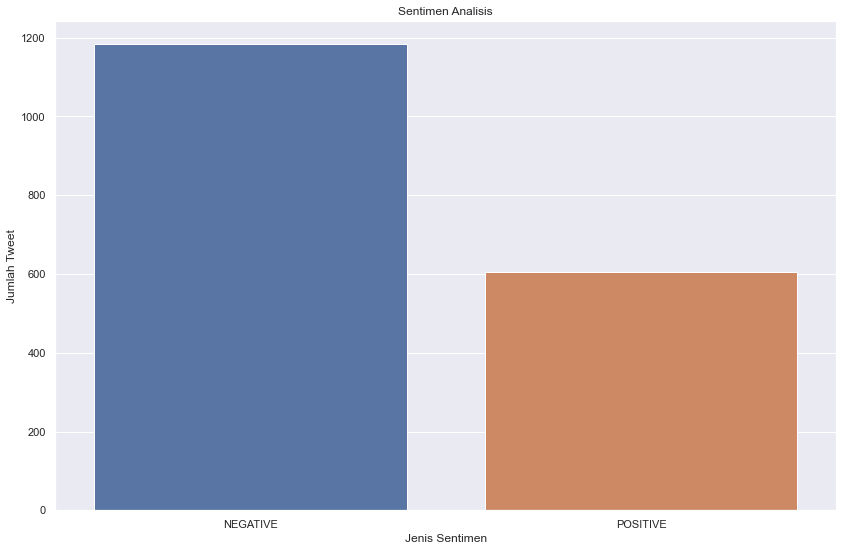

In [39]:
sns.barplot(x = sample.Sentiment.value_counts().index, y = sample.Sentiment.value_counts())
plt.xlabel("Jenis Sentimen")
plt.ylabel("Jumlah Tweet")
plt.title("Sentimen Analisis")
plt.show()

In [40]:
tokenized_tweet=sample['processed_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                                        [news, canada, britishcolumbia, scientist, work, protect, bc, island, crucial, freshwater, source, fire, drought]
1    [jr66112852, matt, hancock, contributed, mass, murder, thousand, elderly, brit, since, bolstered, wealth, sale, book, also, supported, lie, avoid, accountability, britain, mess, covid19, covid, china, vaccine, ukraine, monkeypox]
2                                                                                                                          [ranslating, interpreting, russia, admitted, kidnapped, ukraine, 19, million, people, including, 307423, child]
3                                                                                               [ukraine, ukrainian, 58th, independent, motorized, infantry, brigade, hit, russian, mortar, position, stugna, atgm, sending, tube, flying]
4                                                           

In [41]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(sample['processed_tweets'].values.astype('U'))

In [42]:
from sklearn.model_selection import train_test_split
X=text_counts
y=sample['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [43]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.77374302 0.80167598 0.77094972 0.74022346 0.80392157]
Train accuracy =95.81%
Test accuracy =80.17%


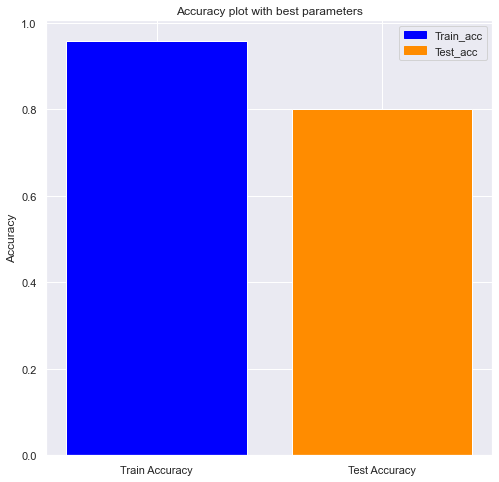

In [44]:
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [45]:
 from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[200  45]
 [ 26  87]]


In [46]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))


              precision    recall  f1-score   support

    NEGATIVE       0.88      0.82      0.85       245
    POSITIVE       0.66      0.77      0.71       113

    accuracy                           0.80       358
   macro avg       0.77      0.79      0.78       358
weighted avg       0.81      0.80      0.81       358



In [47]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =77.97%
Precision score =77.20%
Recall score =79.31%
